# Autora Sofía Alicia Treviño Garza

# Tema: Analisis de EcoBici


In [ ]:
# Esta es una demo con datos de EcoBici para observar sus datos

# Algoritmo a seguir
##  1) Cargar los datos que vamos a observar en un arreglo
##  2) Imprimir y observar los datos del arreglo
##  3) Realizar limpiado de datos para un análisis inicial y seleccionar las preguntas con que abordaremos el análisis de variables
##  4) Seleccionar las variables y observarlas por medio de un arreglo de datos
##  5) Imprimir y mostrar las variables y sacar conclusiones de los datos
##  6) Generar gráficas significativas para explicar las conclusiones de los datos

# Paso 1: Trabajando con la Base de datos del archivo ecobici.cvs 

In [15]:
# Antes de iniciar a leer el archivo preparamos el Python para las librerías a utilizar durante el programa
# IMPORTAR LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from datetime import datetime, date, time, timedelta
import calendar

In [16]:
## Ahora vamos a cargar los datos del archivo de mortalidad.cvs en un arreglo para tenerlos disponibles durante el programa
## Para cargar el archivo usamos el comando read_csv 

Ecobici=pd.read_csv('C:\Anaconda\proyectos\ecobici.csv')

In [14]:
# Vamos a imprimir los datos en pantalla para corroborar que se cargaron en el arreglo
#Ecobici

formatohora = "%H:%M:%S"

#objeto_datetime = datetime.strptime(cadena1, formatohora)
#print("strptime:", fecha1.strftime(formatohora))

horainicial=datetime.strptime("0:00:03",formatohora)
horafinal=datetime.strptime("0:43:22",formatohora)

duracion = horafinal - horainicial
print("Duracion:",duracion)

#Horaselec = Ecobici[['Hora_Retiro','Hora_Arribo']].copy()
#Horaselec


Duracion: 0:43:19


,Hora_Retiro,Hora_Arribo
0,0:00:03,0:43:22
1,0:00:11,0:23:41
2,0:00:22,0:19:33
3,0:00:25,0:10:52
4,0:00:28,0:07:22
5,0:00:35,0:18:52
6,0:00:44,0:18:31
7,0:00:56,0:12:11
8,0:01:42,0:23:46
9,0:02:14,0:20:12


# Paso 2: Vamos a Imprimir y observar los datos del arreglo

In [4]:
## Con la instruccion head vamos a desplegar los encabezados del arreglo 
Ecobici.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,72,4025,401,01/09/2018,0:00:03,158,01/09/2018,0:43:22
1,M,30,9367,72,01/09/2018,0:00:11,233,01/09/2018,0:23:41
2,M,29,10220,35,01/09/2018,0:00:22,299,01/09/2018,0:19:33
3,M,26,10619,86,01/09/2018,0:00:25,470,01/09/2018,0:10:52
4,M,21,3882,185,01/09/2018,0:00:28,188,01/09/2018,0:07:22


In [18]:
Ecobici.describe()

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo
count,701049.000000,701049.000000,701049.000000,701049.000000
mean,34.806382,8411.731154,180.325678,177.447351
std,10.242813,2900.306117,131.365396,131.831075
min,16.000000,349.000000,1.000000,1.000000
25%,27.000000,7226.000000,63.000000,61.000000
50%,32.000000,8947.000000,162.000000,153.000000
75%,40.000000,10533.000000,271.000000,270.000000
max,117.000000,15339.000000,3000.000000,3000.000000


# Paso 3: Realizar limpiado de datos para un análisis inicial y seleccionar las variables utiles para el análisis.
# En este caso queremos observar quien usa más las bici de Ecobici, si los hombres o las mujeres
# Y también queremos saber de que Edad son las personas que mas usan la bici

In [8]:
## Vamos a ver seleccionar solo el Genero_Usuario y la Edad para dejar esos datos y sacar una estadística

Seleccionados = Ecobici[['Genero_Usuario','Edad_Usuario']].copy()
Seleccionados


,Genero_Usuario,Edad_Usuario
0,M,72
1,M,30
2,M,29
3,M,26
4,M,21
5,M,43
6,M,22
7,M,35
8,M,31
9,M,30


In [12]:
# Para ver el comportamiento de la Edad de las personas que usan bici
Seleccionados.describe()

,Edad_Usuario
count,701049.000000
mean,34.806382
std,10.242813
min,16.000000
25%,27.000000
50%,32.000000
75%,40.000000
max,117.000000


In [10]:
# Vamos a ver solo los datos de hombres

Hombres = Seleccionados[Seleccionados['Genero_Usuario'] == 'M']
Hombres

print('Hombres que viajan en bicicleta')
len(Hombres['Genero_Usuario'])

Hombres que viajan en bicicleta


524695

In [11]:
#len(Hombres['Edad_Usuario'].unique())
## Hay 69 Eades diferentes de las mujeres que viajan en bicicleta

print('Hombres que viajan en bicicleta Por Edades')
HombresPorEdad=Hombres.groupby('Edad_Usuario').size()
HombresPorEdad


Hombres que viajan en bicicleta Por Edades


Edad_Usuario
16       240
17       643
18      1750
19      3004
20      4554
21      6491
22      8657
23     11358
24     16499
25     21611
26     23015
27     25995
28     29337
29     28396
30     25409
31     25580
32     23201
33     20350
34     20580
35     18415
36     16711
37     15728
38     15814
39     13426
40     11540
41     10766
42      9047
43      9119
44      8957
45      9540
       ...  
55      4506
56      4259
57      3767
58      2907
59      3385
60      2393
61      1958
62      1939
63      1655
64      1664
65      1335
66       835
67       749
68       638
69       472
70       581
71       384
72       396
73       285
74       112
75        80
76       153
77       145
78        14
79        22
81         6
83        17
86        21
95         1
117       24
Length: 69, dtype: int64

In [12]:
# Vamos a ver solo los datos de Mujeres

Mujeres = Seleccionados[Seleccionados['Genero_Usuario'] == 'F']
Mujeres

print('Mujeres que viajan en bicicleta')
len(Mujeres['Genero_Usuario'])

Mujeres que viajan en bicicleta


176354

In [13]:
##len(Mujeres['Edad_Usuario'].unique())
## Hay 62 Edades diferentes de las mujeres que viajan en bicicleta

print('Mujeres que viajan en bicicleta Por Edades')
MujeresPorEdad=Mujeres.groupby('Edad_Usuario').size()
MujeresPorEdad


Mujeres que viajan en bicicleta Por Edades


Edad_Usuario
16       100
17        86
18       533
19       866
20      1828
21      2532
22      3798
23      4636
24      7822
25     10247
26     10793
27     11191
28     11612
29     11454
30     10575
31      9317
32      8285
33      6475
34      6885
35      5708
36      4972
37      4485
38      4107
39      3611
40      2689
41      3164
42      2278
43      2265
44      2108
45      1681
       ...  
48      1527
49      1611
50      1344
51      1182
52      1291
53       956
54      1028
55      1166
56      1070
57      1004
58       705
59       560
60       584
61       316
62       468
63       272
64       239
65       144
66       224
67       246
68        98
69        91
70        32
71        53
72       133
73        84
74        33
77        33
81         2
117        2
Length: 62, dtype: int64

## Esta es una gráfica del uso de la biciclenta de Mujeres VS Hombres y corresponden al mes de Septiembre 2018

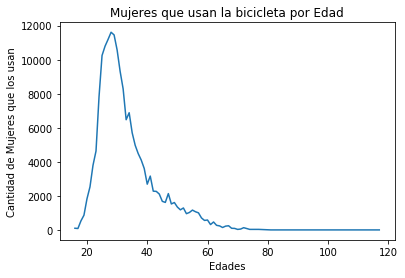

In [65]:
MujeresPorEdad.plot(kind='line')
plt.xlabel('Edades')
plt.ylabel('Cantidad de Mujeres')
plt.title('Mujeres que usan la bicicleta por Edad')
plt.show()

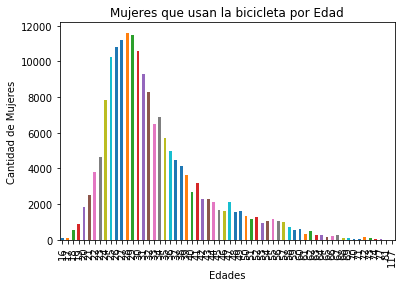

In [77]:
MujeresPorEdad.plot(kind='bar')
plt.xlabel('Edades')
plt.ylabel('Cantidad de Mujeres')
plt.title('Mujeres que usan la bicicleta por Edad')
plt.show()

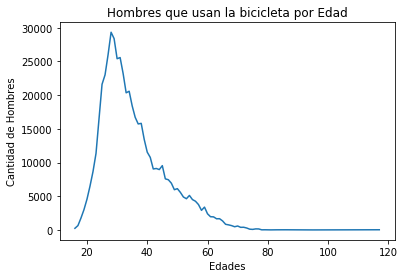

In [66]:
HombresPorEdad.plot(kind='line')
plt.xlabel('Edades')
plt.ylabel('Cantidad de Hombres')
plt.title('Hombres que usan la bicicleta por Edad')
plt.show()

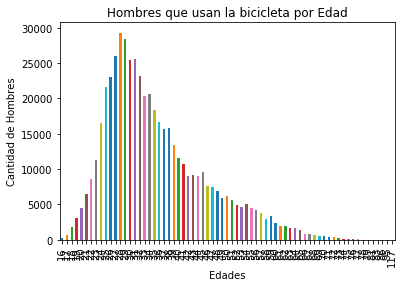

In [76]:
HombresPorEdad.plot(kind='bar')
plt.xlabel('Edades')
plt.ylabel('Cantidad de Hombres')
plt.title('Hombres que usan la bicicleta por Edad')
plt.show()

Text(0.5,1,'Comparativa del uso de la bicicleta de Mujeres vs Hombres')

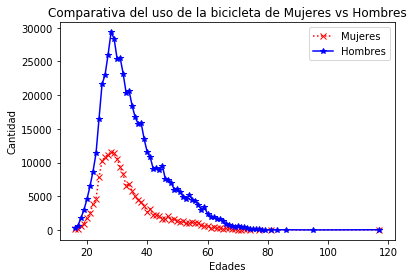

In [84]:
plt.plot(MujeresPorEdad, marker='x', linestyle=':', color='r', label = "Mujeres")
plt.plot(HombresPorEdad, marker='*', linestyle='-', color='b', label = "Hombres")
plt.legend(loc="upper right")
plt.xlabel('Edades')
plt.ylabel('Cantidad')
plt.title('Comparativa del uso de la bicicleta de Mujeres vs Hombres')

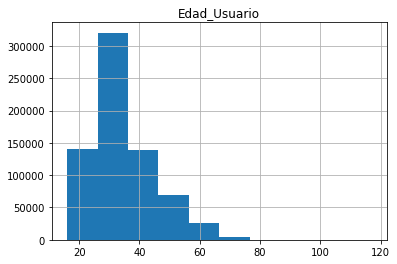

In [14]:
# La mayoría de las personas que usan bicicleta están entre los 20 y 40 años
# Esto lo podemos ver en el siguiente histograma
Seleccionados.drop(['Genero_Usuario'],1).hist()
plt.show()

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj,

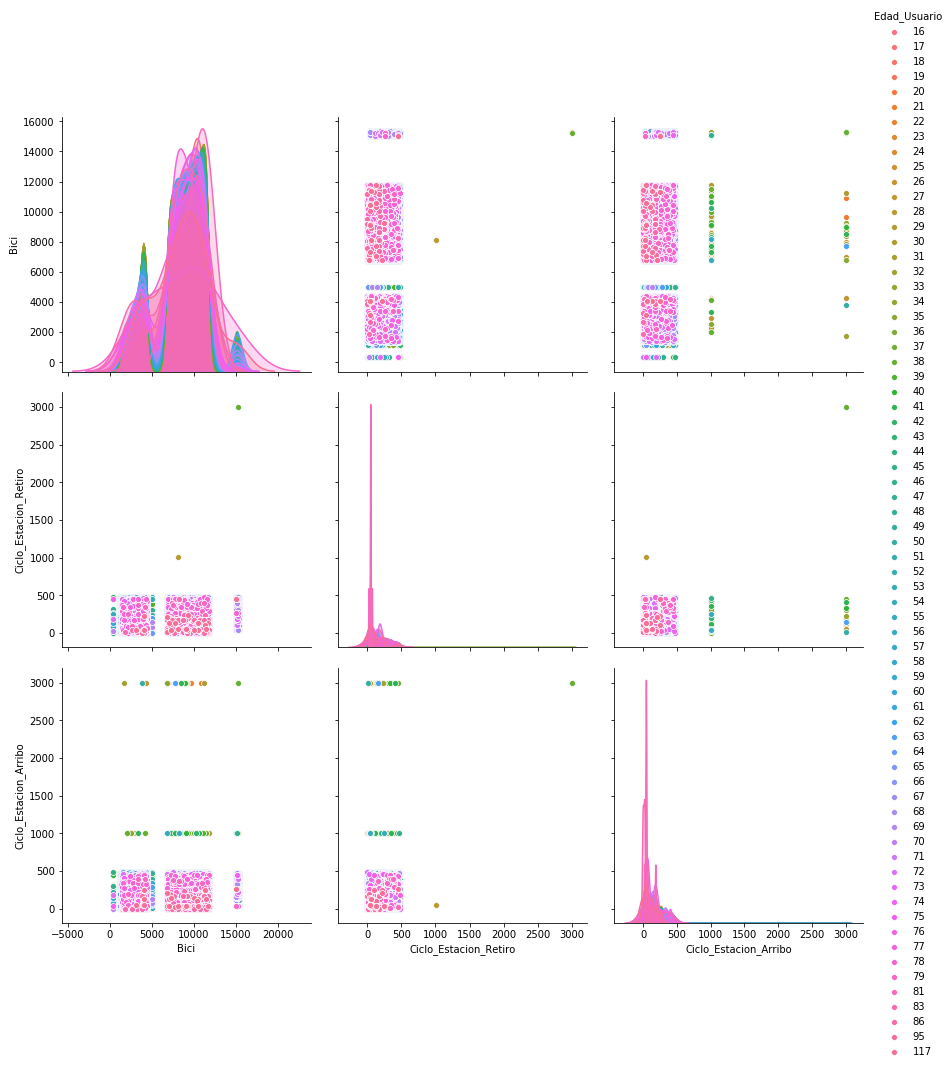

In [30]:
sb.pairplot(Ecobici.dropna(), hue='Edad_Usuario',height=4,vars=["Bici","Ciclo_Estacion_Retiro","Ciclo_Estacion_Arribo"],kind='scatter')